<a href="https://colab.research.google.com/github/boleslawkol/Purdue-Notebooks/blob/main/E2E_Titanic_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement

The titanic dataset has the demographic details of its passesngers. The goal of this project is to predict if a passenger would survive and why.

Success will be measured with ROC AUC Score and the objective is to get an ROC AUC Score > 0.9

# 2. Data extraction

This is an open source dataset from www.kaggle.com

# 3. Exploratory Data Analysis

# 4. Feature Engineering

# 5. Feature Selection

# 6. Model Selection

# 7. Model tuning

# 8. Model serving (if applicable)

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')

## 2. Data extraction

In [ ]:
# Import train and test csv datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

There was no need for data wrangling as data is already in tabular form consolidatad in a single file

## 3. Exploratory Data Analysis

- Data Shape
- Data Types
- Target variable
- Missing Values
- Constant features
- Cardinality
- Duplicate features
- Correlations
- Scale
- Distributions (skewness)
- Outliers

In [ ]:
# Data shape and type

train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


This dataset has:
- 12 features (5 categorical and 7 numerical)
- 891 observations
- 3 features with missing values: ['Age'], ['Cabin'], ['Embarked']

The target variable is ['Survived']

In [ ]:
# Percentage of missing values

train.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

- From the 3 variables (['Age'], ['Cabin'], ['Embarked']) with missing values, none has more than 95% missing data to consider dropping it. We will determine imputation method after further analysis

In [ ]:
# Constant features

train.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

This dataset has:
- 2 binary features: ['Survived'], ['Sex']

As ['Survived'] is our target variable, binary classification algorithms may be the most suitable for our predictions. This gives the option to do monotonic relationship encoder for ['Sex'], ['Ticket'], ['Cabin'] and ['Embarked'] using WoE or PRatio encoders.


['PassengerID'] and ['Name'] have as many uniqiue values as there are observations in our dataset; ['Name'] is categorical so we may drop this feature. ['PassengerID'] requires further analysis; however, judging by the name of the variable, this may be ordinal with no significance and we may have to drop it too.

In [ ]:
# High level statistics for numercal variables

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- ['PassengerId'] mean and median are the same making the symmetrical normal and it seems to be ordinal with a unique value per observation, making the variable irrelevant.
- ['Pclass'] has a left tail (skewness) as its median is bigger than its mean and it seems to be ordinal with 3 unique values. Scale lies within 1 order of magnitude
- ['Age'] has a right tail (skewness) as its mean is bigger than its median. Scale falls within 2 orders of magnitude from 0.42 to 80
- ['SibSp'] has a right tail (skewness) as its mean is bigger than its median. Scale falls within same orders of magnitude from 0 to 8
- ['Parch'] has a right tail (skewness) as its mean is bigger than its median. Scale falls within same order of magnitude from 0 to 6
- ['Fare'] has a right tail (skewness) as its mean is bigger than its median. Scale falls within 3 orders of magnitude from 0 to 512
- ['SibSp'] and ['Parch'] have similar scales, while ['Age'] ['Fare'] have larger scales and may require scaling


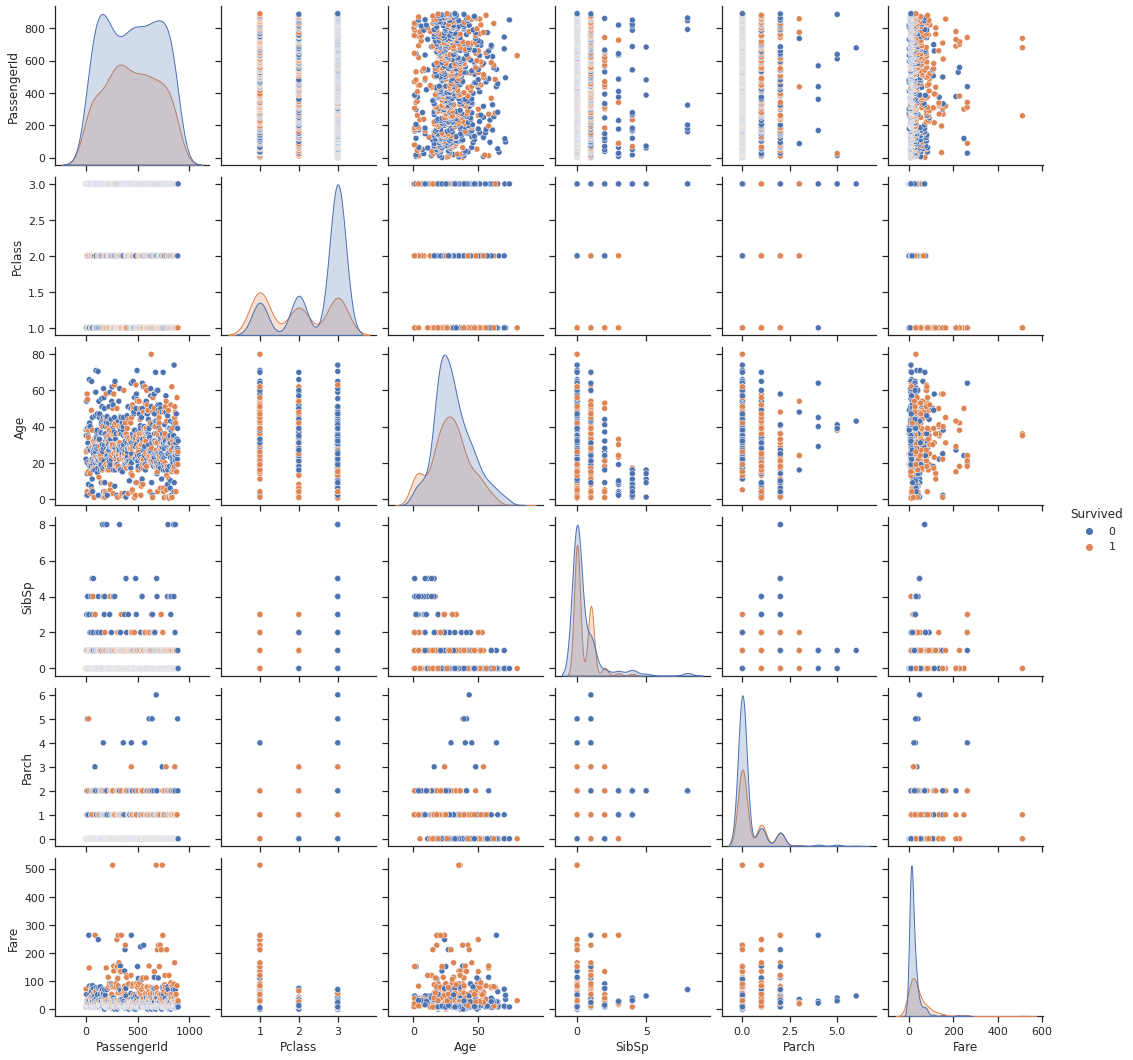

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(train, hue='Survived')

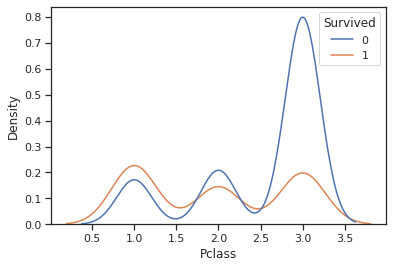

In [ ]:
sns.kdeplot(train['Pclass'], hue=train['Survived'])

['Plcass'] seems to be a good predictor as more people survived in Class 1 than in class 3

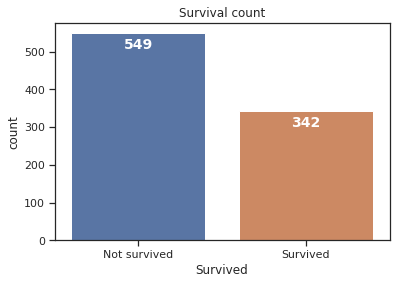

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Survived', data=train)
plt.xticks(np.arange(2), ['Not survived', 'Survived'])
plt.title('Survival count')

labels = (train['Survived'].value_counts())
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
plt.show()

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

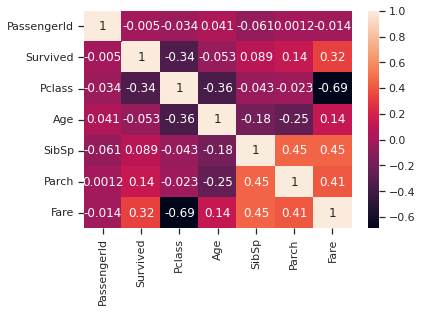

In [ ]:
sns.heatmap(train.corr(method='spearman'), annot=True)

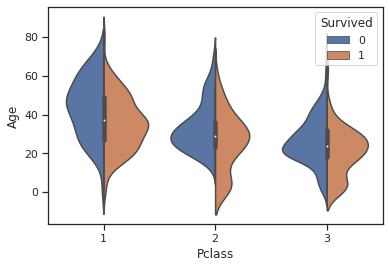

In [ ]:
sns.violinplot(data=train, x='Pclass', y='Age', hue='Survived', split=True)

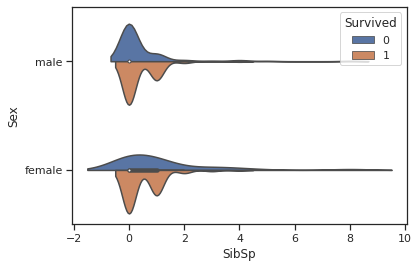

In [ ]:
sns.violinplot(data=train, x='SibSp', y='Sex', hue='Survived', split=True)

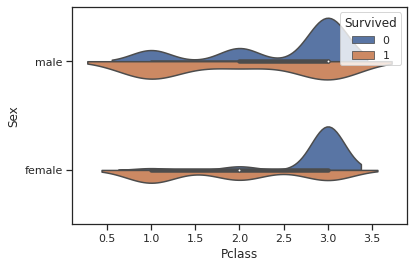

In [ ]:
sns.violinplot(data=train, x='Pclass', y='Sex', hue='Survived', split=True)

In [ ]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 4. Feature Engineering

- Split data in train and validation
- Missing values imputation
- Deal with outliers
- Encoding
- Variance Stabilizing Transformations
- Scaling

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Split in train and validation

from sklearn.model_selection import train_test_split

y = train['Survived']
X = train.drop(columns=['Survived','PassengerId','Name'])

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)

In [ ]:
# Numerical imputation

from feature_engine.imputation import MeanMedianImputer

num_imputer = MeanMedianImputer()
num_imputer.fit(X_train)

X_train = num_imputer.transform(X_train)
#X_val = num_imputer.transform(X_val)

In [ ]:
# Categorical imputation

from feature_engine.imputation import CategoricalImputer

cat_imputer = CategoricalImputer()
cat_imputer.fit(X_train)

X_train = cat_imputer.transform(X_train)
#X_val = cat_imputer.transform(X_val)

In [ ]:
# Deal with outliers

from feature_engine.outliers import Winsorizer

capper = Winsorizer(capping_method="iqr", tail="both")
capper.fit(X_train)

X_train = capper.transform(X_train)
#X_val = capper.transform(X_val)

In [ ]:
# Rare label encoder

from feature_engine.encoding import RareLabelEncoder

rare_encoder = RareLabelEncoder()
rare_encoder.fit(X_train)

X_train = rare_encoder.transform(X_train)
#X_val = rare_encoder.transform(X_val)

In [ ]:
X_train['Embarked'].unique()

array(['S', 'C', 'Q', 'Missing'], dtype=object)

In [ ]:
# Label encoder

from feature_engine.encoding import WoEEncoder

woe_encoder = WoEEncoder(variables=['Sex', 'Ticket', 'Cabin'])
woe_encoder.fit(X_train, y_train)

X_train = woe_encoder.transform(X_train)
#_val = woe_encoder.transform(X_val)

In [ ]:
# Label encoder for Embarked

from feature_engine.encoding import CountFrequencyEncoder

count_encoder = CountFrequencyEncoder(encoding_method='frequency', variables='Embarked')
count_encoder.fit(X_train)

X_train = count_encoder.transform(X_train)
#X_val = count_encoder.transform(X_val)

In [ ]:
# Variance Stabilizing Transformations

from feature_engine.transformation import YeoJohnsonTransformer

yeo_trans = YeoJohnsonTransformer()
yeo_trans.fit(X_train)

X_train = yeo_trans.transform(X_train)
#X_val = yeo_trans.transform(X_val)

In [ ]:
# Scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
#X_val = scaler.transform(X_val)

## 5. Feature Selection
- Drop Duplicate
- Drop Constant/Quasi constant
- Drop correlated
- Embedded methods

In [ ]:
from feature_engine.selection import DropConstantFeatures, SmartCorrelatedSelection, DropDuplicateFeatures

# Drop constant
drop_const = DropConstantFeatures()
drop_const.fit(X_train)

X_train = drop_const.transform(X_train)
#X_val = drop_const.transform(X_val)

# Drop duplicates
drop_dup = DropDuplicateFeatures()
drop_dup.fit(X_train)

X_train = drop_dup.transform(X_train)
#X_val = drop_dup.transform(X_val)


# Drop correlated
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

drop_corr = SmartCorrelatedSelection(method='spearman',
                                     selection_method='model_performance',
                                     estimator=logreg)
drop_corr.fit(X_train, y_train)

X_train = drop_corr.transform(X_train)
#X_val = drop_corr.transform(X_val)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(num_imputer,
                     cat_imputer,
                     capper,
                     rare_encoder,
                     woe_encoder,
                     count_encoder,
                     yeo_trans,
                     scaler,
                     drop_const,
                     drop_dup,
                     drop_corr)

X_val = pipe.transform(X_val)

### 6. Model Selection

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
preds = logreg.predict(X_val)

In [ ]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(preds, y_val)
print(score)

0.7943149421432164
